# Neural Networks

## Lecture Overview

- Where are we at the history of AI?
- Machine learning and stochastic or probabilistic models
- Bag of words and sequence models
- Machine Learning and Deep Learning
- Coding out the percpeptron
- Numpy and vectors

## Where are we at the history of AI?

- AlphaGo
- AlphaZero
- AlphaFold
- GPT-3
- ChatGPT
- OpenAI Codex
- Dall-E
- OpenAI CLIP
- Stable Diffusion
- GPT-4


<center><img src="../images/jurafsky_goal.png" width="800"></center>

## Machine learning and stochastic or probabilistic model

Machine learning models can become very powerful tools with the right data and the right model.

<center><img src="../images/where_we_are.png" width="800"></center>

## Bag of words and sequence models

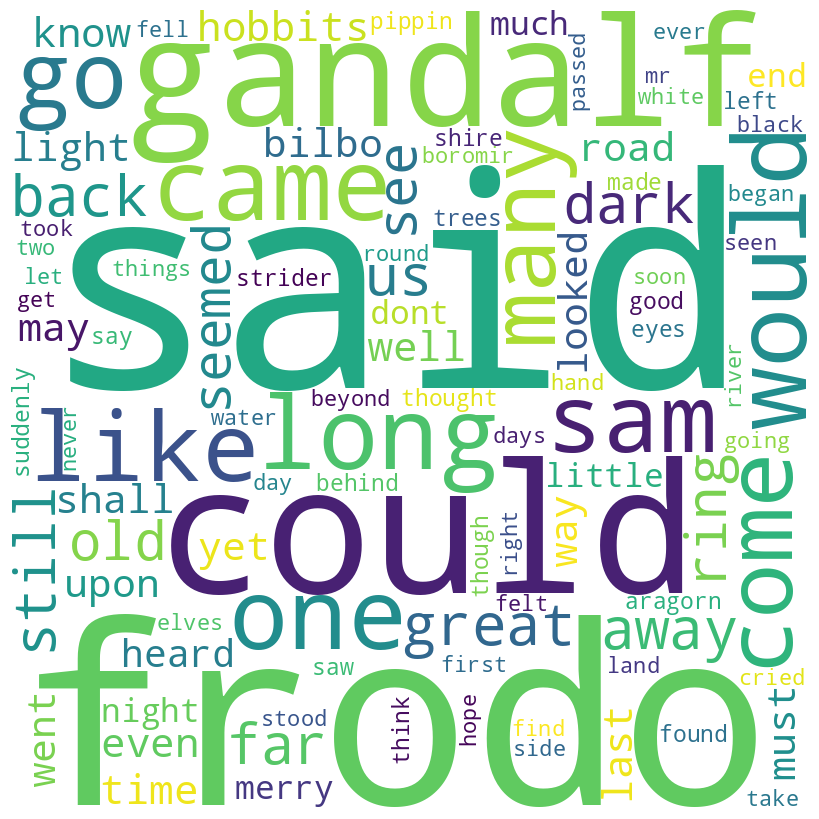

In [2]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

# Step 1: Read in the text input file and store the contents as a string variable.
with open('../datasets/01_LOTR_Fellowship.txt', 'r') as file:
    text = file.read()

# Step 2: Remove any punctuation, numbers, or special characters from the text string.
text = re.sub('[^A-Za-z ]+', '', text)

# Step 3: Convert the string to lowercase to ensure consistency.
text = text.lower()

# Step 4: Split the text string into individual words, and store each word in a list.
words = text.split()

# Step 5: Create an empty dictionary to store the word counts.
word_counts = {}

# Step 6: Remove stopwords from the list of words.
words = [word for word in words if word not in list(stopwords.words('english'))]

# Step 6: Iterate through the list of words, and for each word:
for word in words:
    # a. If the word is already in the dictionary, increment its count by 1.
    if word in word_counts:
        word_counts[word] += 1
    # b. If the word is not in the dictionary, add it to the dictionary with a count of 1.
    else:
        word_counts[word] = 1

# Step 7: Sort the dictionary by count, in descending order.
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Step 8: Display the top words in the word cloud, using larger font sizes for words with higher counts.
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(sorted_word_counts)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


* We created N-Grams Models 
* We feature engineered our data using bag of words and TF-IDF
* We used Naive Bayes and Logistic Regression to classify text
* We introduced concepts of feature engineering, model architecture, model evaluation, hyperparameter tuning, and model selection

Now we want to take it a step further and use neural networks to analyze text. The importance of NLP as a data scientists is that nearly every analysis we do will involve text in some way.

## Bag of words and sequence models

Langauge, however, is not just a bag of words. It is a sequence of words. So, we can ask ourselves how we can improve our models by taking into account the sequence of words? What architectures can we use to do this? And what architectures can we engineer to model the sequence of words? How can our data structures be improved to model the sequence of words?

* Neural networks
* Recurrent Neural Networks
* Long Short Term Memory (LSTM)
* Gated Recurrent Unit (GRU)
* Transformers


* Vectorization

## Machine Learning and Deep Learning

<center><img src="https://images.anandtech.com/doci/12673/AI-Circle.png" width="800" height="600" /></center>

Image source: https://www.anandtech.com/show/12673/titan-v-deep-learning-deep-dive/2

## Coding out the percpeptron

<center><img src="../images/Neuron.drawio.png" width="800" height="400" /></center>

In [3]:
## Let's code the perceptron out from basic python

inputs = [1, 2, 3, 2.5] # tokens (the output of a tokenization process: tiktoken)

weights = [0.2, 0.8, -0.5, 1.0] # random weights - we will learn how to adjust these weights

bias = 2 # random bias - we will learn how to adjust this bias

outputs = inputs[0] * weights[0] + inputs[1] * weights[1] + inputs[2] * weights[2] + inputs[3] * weights[3] + bias

print(outputs)

4.8


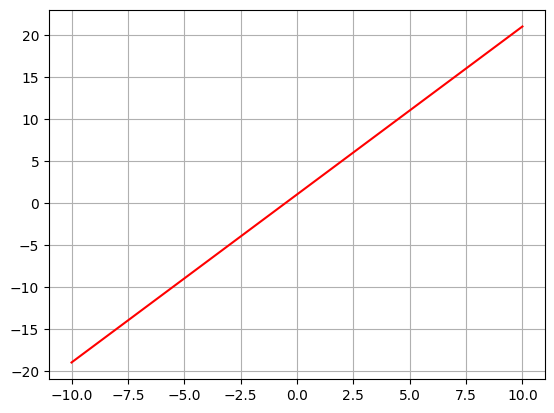

In [4]:
## Generate a linear plot for weight and bias

import numpy as np

import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = 2 * x + 1

# Plot the line
plt.plot(x, y, '-r', label='y=2x+1')

# add a grid
plt.grid()

We can thus conceptualize the `output = weight*input+bias` is similar to a linear relationship: $y = mx + b$.

### Let's make create a layer of neurons

In [32]:
inputs = [1, 2, 3, 2.5]


# Every input has a weight with it
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]



# Every neuron has one bias.
bias1 = 2
bias2 = 3
bias3 = 0.5


# Add up inputs + weights + bias
output = [inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
          inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
          inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3]



print(output)

[4.8, 1.21, 2.385]


### Example of a Layer of Neurons

https://www.youtube.com/watch?v=fXSRfzhHPm0&t=18s

In [33]:
## We can rewrite our code to be more efficient to handle multiple neurons

inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    """process the neuron weights with their biases: output = input*weight"""
    neuron_output = 0

    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    
    neuron_output += neuron_bias

    layer_outputs.append(neuron_output)

layer_outputs

[4.8, 1.21, 2.385]

### We bring additonal optimization by working with with vectors

In [36]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1]

biases = 2

## We can use numpy to make our code more efficient
layer_outputs = np.dot(weights, inputs) + biases

layer_outputs

4.8

### Our Numpy dot product defined:

$$\vec{a} \cdot \vec{b} = \sum_{i=1}^n a_1 b_2 + a_2 b_2 + \dots a_n b_n$$

### Layers with numpy

In [37]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

ayer_outputs = np.dot(weights, inputs) + biases

layer_outputs

4.8

### Now we need an activation function

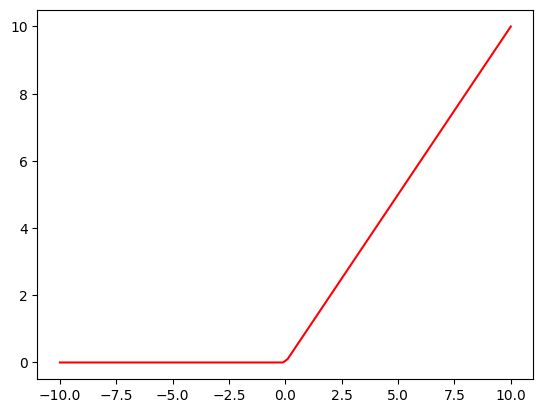

In [35]:
## Rectified Linear Activation Function

## plot the function
X = np.linspace(-10, 10, 100)
y = np.maximum(X, 0)

plt.plot(X, y, '-r', label='ReLU')

## Batches

Before we can code out a neural network, we need to introduce the idea of batches. Batches are a way to speed up our neural network. We can think of batches as a way to vectorize our entire neural network.

In [40]:
import numpy as np

# Batches and shape errors

inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,0.33],
            [-0.44,0.73,-0.13]]

biases = [2.0,3.0,0.5]
biases2 = [-1,2,-0.5]

# if we try to forward pass over the weights, we get an error   
# outputs = np.dot(inputs, weights) + biases

# ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)

# we have to reshape the data for the proper function to work
# output_layer1 = np.dot(inputs, np.array(weights).T) + biases
# output_layer2 = np.dot(output_layer1, np.array(weights2).T) + biases2

# print(output_layer2)

### Matrix Multiplication and Transpose

https://nnfs.io/jei/


Transposition is reshaping the array and/or broadcasting the array to a new shape. The rows become the columns and the columns become the rows. The transpose of a matrix is denoted by $A^T$.

### Matrix Transpose

In [26]:
matrix = [
    [1, 5, 7, 6],
    [2, 1, 3, 5],
    [4, 7, 2, 9],
    [1, 2, 4, 5],
]

In [27]:
# how can we transpose this matrix?

class tensor:
    """This class let's us transpose a matrix
    """
    
    def __init__(self, matrix):
        self.matrix = matrix
    
    @property
    def T(self):
        return [[row[i] for row in self.matrix] for i in range(len(self.matrix[0]))]
        

In [28]:
matrix = tensor(matrix)
matrix.T

[[1, 2, 4, 1], [5, 1, 7, 2], [7, 3, 2, 4], [6, 5, 9, 5]]

In [33]:
matrix = [
    [1, 5, 7, 6],
    [2, 1, 3, 5],
    [4, 7, 2, 9],
    [1, 2, 4, 5],
]

def T(matrix: list[list[int]]) -> list[list[int]]:
    """This function let's us transpose a matrix
    """
    T = []
    
    for col in range(len(matrix[0])):
        new_row = []
        for row in range(len(matrix)):
            new_row.append(matrix[row][col])
        T.append(new_row)
    return T  

In [34]:
T(matrix)

[[1, 2, 4, 1], [5, 1, 7, 2], [7, 3, 2, 4], [6, 5, 9, 5]]

### Matrix Multiplication

When we multiply two matrices, we need to make sure that the inner dimensions are the same. The inner dimensions are the number of columns in the first matrix and the number of rows in the second matrix. The result of the multiplication will be the outer dimensions. The outer dimensions are the number of rows in the first matrix and the number of columns in the second matrix.

In [42]:
# Matrix multiplication in vanilla python

def matmul(matrix_a, matrix_b):
    """multiply two matrices together
    """
    result = [[0 for i in range(len(matrix_b[0]))] for j in range(len(matrix_a))]
    
    for i in range(len(matrix_a)):
        for j in range(len(matrix_b[0])):
            for k in range(len(matrix_b)):
                result[i][j] += matrix_a[i][k] * matrix_b[k][j]
    return result

In [43]:
matrix_a = [
    [1, 5, 7, 6],
    [2, 1, 3, 5],
]

matrix_b = [
    [1, 5],
    [2, 1],
    [4, 7],
    [1, 2],
]

In [44]:
# Multiply matrix_a by matrix_b
matmul(matrix_a, matrix_b)

[[45, 71], [21, 42]]

In [45]:
# numpy matrix multiplication

import numpy as np

matrix_a = np.array(matrix_a)
matrix_b = np.array(matrix_b)

method_1 = np.dot(matrix_a, matrix_b)
method_2 = matrix_a @ matrix_b

assert (method_1 == method_2).all()

method_1, method_2

(array([[45, 71],
        [21, 42]]),
 array([[45, 71],
        [21, 42]]))

### Adding Layers with batch processing to our Neural Network

Understanding the forward pass

In [42]:
import numpy as np

# Batches and shape errors

inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,0.33],
            [-0.44,0.73,-0.13]]

biases = [2.0,3.0,0.5]
biases2 = [-1,2,-0.5]


## The forward pass
output_layer1 = np.dot(inputs, np.array(weights).T) + biases
output_layer2 = np.dot(output_layer1, np.array(weights2).T) + biases2

print(output_layer2)

[[ 0.5031   0.53225 -2.03875]
 [ 0.2434  -2.6012  -5.7633 ]
 [-0.99314  1.4297  -0.35655]]


In the realm of neural networks, the forward pass denotes the process of input data being propagated through the network to eventually generate an output. This involves a series of linear transformations and non-linear activations. The linear transformations are often captured by the dot product between the input data and the weights of the network. Understanding the rationale behind transposing the weight matrix during this dot product requires delving into the dimensions and algebraic operations involved.

1. **Matrix Dimensions**:
    - In a neural network, each layer's input and weights are represented as matrices. Suppose the input matrix has dimensions $(m, n)$ where $m$ is the number of instances and $n$ is the number of features, and the weight matrix has dimensions $(n, p)$ where $p$ is the number of neurons in the next layer.
    - The aim is to compute a resultant matrix of dimensions $(m, p)$ which will then be passed through an activation function. This resultant matrix represents the linear transformation of the input data through the current layer.

2. **Dot Product Operations**:
    - The dot product between two matrices requires that the number of columns in the first matrix match the number of rows in the second matrix. Hence, in order to perform the dot product between the input matrix and the weight matrix, one of them needs to be transposed.
    - Typically, it's the weight matrix that is transposed to conform to this requirement. Hence, the weight matrix dimensions become $(p, n)$.

3. **Algebraic Representation**:
    - The algebraic operation can be represented as: $\text{Resultant Matrix} = \text{Input Matrix} \cdot \text{Transposed Weight Matrix}$ or $\text{Result} = \text{Input} \cdot \text{Weights}^T$.
    - This operation ensures that each neuron's weights are correctly aligned with the input features during the dot product, facilitating the linear transformation aimed for in this layer of the network.

4. **Coding Perspective**:
    - From a coding standpoint, transposing the weight matrix and performing the dot product is a straightforward operation in languages like Python, utilizing libraries like NumPy.
  
    ```python
    import numpy as np

    # Assume input_matrix is of shape (m, n) and weights_matrix is of shape (n, p)
    input_matrix = np.array([[...], [...], ...])
    weights_matrix = np.array([[...], [...], ...])

    # Performing the dot product
    resultant_matrix = np.dot(input_matrix, weights_matrix.T)
    ```

**An analogy**:
Think of the forward pass like a relay race where data is passed from one layer to the next. Now, when the input data reaches a layer, it's like a runner (input) trying to hand over the baton to the next runner (neurons in the next layer). But they can only successfully hand over the baton if their hands (dimensions) align properly. Transposing the weight matrix is like adjusting the hands so that the baton can be passed smoothly, ensuring that each feature in the input data properly interacts with the corresponding weights of the neurons in the layer.

### Let's increase the sophistication of our neural network design

In [47]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
dense1.forward(X)

print(dense1.output)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.04751882e-04  1.13953611e-04 -4.79834998e-05]
 [-2.74148420e-04  3.17291502e-04 -8.69217984e-05]
 [-4.21883655e-04  5.26662567e-04 -5.59126820e-05]
 [-5.77076804e-04  7.14014051e-04 -8.94304394e-05]
 [-3.54306976e-04  3.50254879e-04 -2.33634812e-04]
 [-8.92670010e-04  1.07678759e-03 -1.94532375e-04]
 [-9.33507807e-04  1.07238023e-03 -3.12273973e-04]
 [-1.12437585e-03  1.31128007e-03 -3.36296740e-04]
 [-1.33869553e-03  1.62009057e-03 -2.81017943e-04]
 [-1.48779724e-03  1.79484230e-03 -3.23859538e-04]
 [-1.20035873e-03  1.58119109e-03  8.65937000e-06]
 [-1.56528328e-03  1.99173321e-03 -1.30997345e-04]
 [-1.85718178e-03  2.30642664e-03 -2.70479388e-04]
 [-1.78093580e-03  2.27836682e-03 -1.24245722e-04]
 [-1.85300526e-03  2.38476763e-03 -1.00471654e-04]
 [-6.99865050e-04  1.11472746e-03  3.96097894e-04]
 [-2.19024252e-03  2.79446482e-03 -1.68075712e-04]
 [-1.69829139e-03  2.29598465e-03  1.31671681e-04]
 [-2.60229013e-03  3.27291898e-

### Adding our activation function

In [48]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


X, y = spiral_data(samples=100, classes=3)

layer1 = Layer_Dense(2, 5) # inputs and neurons
activation1 = ReLU()

layer1.forward(X) # inputs * weights + bias
activation1.forward(layer1.output)
print(activation1.output)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 4.6550449e-05 4.5684628e-06]
 [0.0000000e+00 5.9346880e-06 0.0000000e+00 2.0357311e-05 6.1002436e-05]
 ...
 [1.1329151e-02 0.0000000e+00 0.0000000e+00 8.1107961e-03 0.0000000e+00]
 [1.3458835e-02 0.0000000e+00 3.0949395e-03 5.6633754e-03 0.0000000e+00]
 [1.0781791e-02 0.0000000e+00 0.0000000e+00 8.7256189e-03 0.0000000e+00]]


### ReLU and Hidden Layers

We can use the ReLU activation function to add non-linearity to our neural network. We can also add multiple hidden layers to our neural network. This will allow our neural network to learn more complex relationships between our inputs and outputs.

https://nnfs.io/mvp/

https://nnfs.io/moo/



### Softmax Activation Function

Let's now add an activation function to our neural network. We will use the softmax activation function. The softmax activation function is used for classification problems. It will output a probability distribution over the possible classes.

$$S_{i,j} = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

In [49]:
### In Python:

layer_outputs = [4.8, 1.21, 2.385]

# Step 1: exponetiate the values with Euler's number

E = 2.71828182846 # math.e

exp_values = []
for o in layer_outputs:
    exp_values.append(E**o)
exp_values


[121.51041751893969, 3.3534846525504487, 10.85906266492961]

In [50]:
# Step 2: normalize the values
norm = sum(exp_values) # sum of all the values

norm_values = []
for value in exp_values:
    norm_values.append(value/norm)

norm_values

[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]

In [51]:
# Step 3: sum of all the values should be 1
sum(norm_values)

1.0

In [52]:
## Softmax activate class

class Softmax:
    def forward(self, inputs):
        # get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        # save the output
        self.output = probabilities

### Let's add the softmax activation function to our neural network

In [53]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# Our training data
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 5 output values
dense1 = Layer_Dense(2, 5) # inputs and neurons

# Create ReLU activation (to be used with Dense layer):
activation1 = ReLU()

# Create second Dense layer with 5 input features
dense2 = Layer_Dense(5, 3) # inputs and neurons

# Create Softmax activation (to be used with Dense layer):
activation2 = Softmax()

# Complete forward pass
dense1.forward(X) # inputs * weights + bias

# Complete forward pass
activation1.forward(dense1.output)

# Complete forward pass
dense2.forward(activation1.output)

# Complete forward pass
activation2.forward(dense2.output)

# Let's see output of the first few samples:
activation2.output[:10]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.3333334 , 0.33333328, 0.33333328],
       [0.33333355, 0.33333325, 0.33333322],
       [0.3333333 , 0.33333308, 0.3333336 ],
       [0.33333334, 0.33333302, 0.3333336 ],
       [0.33333385, 0.33333313, 0.33333302],
       [0.33333358, 0.33333296, 0.33333346],
       [0.33333403, 0.33333305, 0.33333287],
       [0.333334  , 0.33333302, 0.333333  ],
       [0.33333364, 0.33333275, 0.33333364]], dtype=float32)

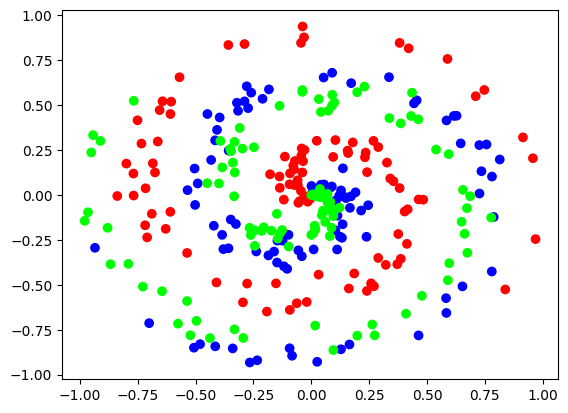

In [54]:
## Does the output make sense?

# let's plot the data
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')

### Coding out the percpeptron

```python

import numpy as np

class Perceptron:
    def __init__(self, n_inputs, epochs=10, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(n_inputs + 1)
        self.errors = []
        
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0
        return activation
    
    def fit(self, X, y):
        for _ in range(self.epochs):
            error = 0
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                update = self.learning_rate * (target - prediction)
                self.weights[1:] += update * inputs
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

```